<a href="https://colab.research.google.com/github/tableClothed/ML-Projects/blob/master/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

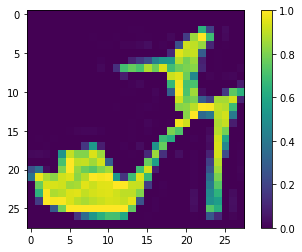

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

data = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = data.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images/255.0
train_labels = train_labels/255.0 # to get the decimal/float values

plt.figure()
plt.grid(False)
plt.imshow(train_images[9])
plt.colorbar()
plt.show()


In [8]:
print(train_labels)

[0.03529412 0.         0.         ... 0.01176471 0.         0.01960784]


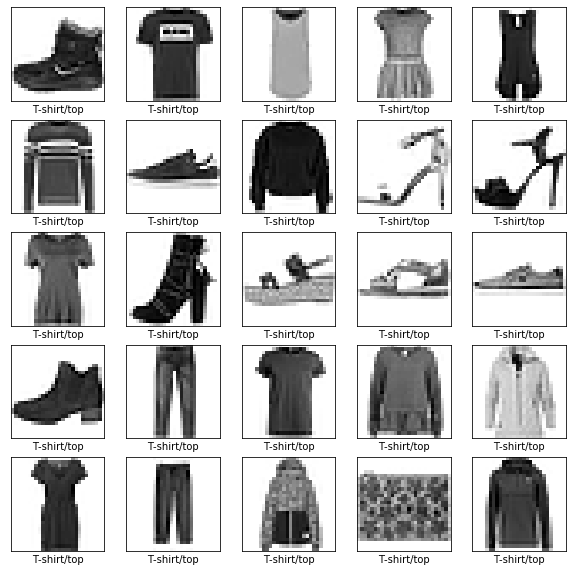

In [25]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[int(train_labels[i])])
plt.show()

Podstawowym elementem składowym sieci neuronowej jest warstwa. Warstwy wyodrębniają reprezentacje z wprowadzonych do nich danych. Mamy nadzieję, że te reprezentacje mają znaczenie dla omawianego problemu.

Większość Deep Learningu polega na łączeniu ze sobą prostych warstw. Większość warstw, takich jak tf.keras.layers.Dense, ma parametry, których uczy się podczas treningu.

Pierwsza warstwa w tej sieci, tf.keras.layers.Flatten, przekształca format obrazów z dwuwymiarowej tablicy (28 na 28 pikseli) w jednowymiarową (28 * 28 = 784 pikseli). Pomyśl o tej warstwie jako o rozłożeniu rzędów pikseli na obrazie i ustawieniu ich w kolejce. Ta warstwa nie ma parametrów do nauki; formatuje tylko dane.

Po spłaszczeniu pikseli sieć składa się z sekwencji dwóch warstw tf.keras.layers.Dense. Są to gęsto połączone lub w pełni połączone warstwy neuronowe. Pierwsza gęsta warstwa ma 128 węzłów (lub neuronów). Druga (i ostatnia) warstwa to 10-węzłowa warstwa softmax, która zwraca tablicę 10 wyników prawdopodobieństwa, które sumują się do 1. Każdy węzeł zawiera ocenę wskazującą prawdopodobieństwo, że bieżący obraz należy do jednej z 10 klas.

In [26]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Zanim model będzie gotowy do treningu, potrzebuje jeszcze kilku ustawień. Są one dodawane podczas kroku kompilacji modelu:

*   **Funkcja utraty** (loss function) - mierzy to, jak dokładny jest model podczas treningu. Chcesz zminimalizować tę funkcję, aby „sterować” modelem we właściwym kierunku.
*   **Optymalizator** - w ten sposób model jest aktualizowany na podstawie danych, które widzi i funkcji utraty.
*   **Metryki** - Służy do monitorowania kroków szkolenia i testowania. W poniższym przykładzie użyto dokładności, czyli części poprawnie sklasyfikowanych obrazów.

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0021 - acc: 0.1000
Epoch 2/10
60000/60000 [==============================] - 4s 60us/sample - loss: 1.8733e-06 - acc: 0.1000
Epoch 3/10
60000/60000 [==============================] - 4s 62us/sample - loss: 4.6460e-07 - acc: 0.1000
Epoch 4/10
60000/60000 [==============================] - 4s 61us/sample - loss: 1.4138e-07 - acc: 0.1000
Epoch 5/10
60000/60000 [==============================] - 4s 62us/sample - loss: 5.4133e-08 - acc: 0.1000
Epoch 6/10
60000/60000 [==============================] - 4s 60us/sample - loss: 2.0634e-08 - acc: 0.1000
Epoch 7/10
60000/60000 [==============================] - 4s 63us/sample - loss: 7.9150e-09 - acc: 0.1000
Epoch 8/10
60000/60000 [==============================] - 4s 64us/sample - loss: 3.5265e-09 - acc: 0.1000
Epoch 9/10
60000/60000 [==============================] - 4s 63us/sample - loss: 1.6888e-09 - acc: 0.1000
Epoch 10/10
60000/60000 [==

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('Test accuracy:', test_acc)

10000/10000 - 0s - loss: 23479.0957 - acc: 0.1000
Test accuracy: 0.1
